# K-means 聚类

我们将实施和应用K-means到一个简单的二维数据集，以获得一些直观的工作原理。 K-means是一个迭代的，无监督的聚类算法，将类似的实例组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 我们要实现的第一部分是找到数据中每个实例最接近的聚类中心的函数。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
data = loadmat('data/ex7data2.mat')

In [3]:
X = data['X']
data2 = pd.DataFrame(X, columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


## 找到最接近的类别

In [4]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [5]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [6]:
idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

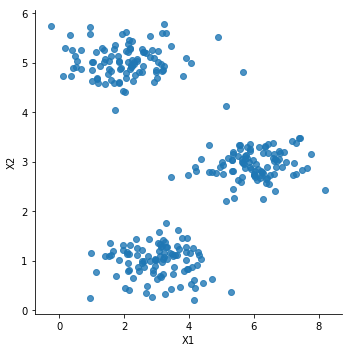

In [7]:
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

## 重新计算聚类中心点，属于该类的数据取加权平均

In [8]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [9]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [10]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [11]:
idx, centroids = run_k_means(X, initial_centroids, 10)

In [12]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

## 结果数据可视化

In [13]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

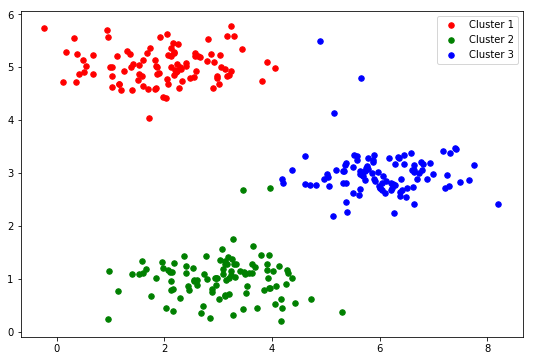

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

## 聚类中心随机初始化

In [15]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [16]:
init_centroids(X, 3)

array([[1.84935524, 1.02232644],
       [3.00708934, 4.67897758],
       [3.17109619, 5.5946452 ]])

# K-means应用于图像压缩

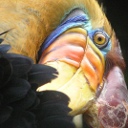

In [17]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [18]:
image_data = loadmat('data/bird_small.mat')
image_data["A"].shape

(128, 128, 3)

In [19]:
A = image_data['A']
A.shape

(128, 128, 3)

In [20]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [21]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
initial_centroids

array([[0.79607843, 0.61960784, 0.29803922],
       [0.96862745, 0.92156863, 0.72941176],
       [0.79607843, 0.60784314, 0.28627451],
       [0.47058824, 0.31764706, 0.21568627],
       [0.76078431, 0.71372549, 0.58431373],
       [0.07843137, 0.09803922, 0.09803922],
       [0.99607843, 0.96470588, 0.71372549],
       [0.0745098 , 0.08235294, 0.05882353],
       [0.22352941, 0.24313725, 0.27058824],
       [0.99607843, 0.96862745, 0.77647059],
       [0.10588235, 0.14901961, 0.14117647],
       [0.6       , 0.4627451 , 0.45098039],
       [0.09019608, 0.10196078, 0.09803922],
       [0.09803922, 0.10980392, 0.09019608],
       [0.99215686, 0.99215686, 0.80392157],
       [0.4627451 , 0.50588235, 0.8       ]])

In [22]:
# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)
idx, centroids

(array([ 0.,  0.,  0., ..., 10., 13., 13.]),
 array([[0.86167303, 0.68732932, 0.41070558],
        [0.79000553, 0.75827033, 0.7763661 ],
        [0.75590619, 0.54198275, 0.25446848],
        [0.52146663, 0.38432428, 0.20606348],
        [0.71827712, 0.63630076, 0.5395796 ],
        [0.08237218, 0.08928543, 0.07842175],
        [0.93634485, 0.80688912, 0.56678097],
        [0.06190604, 0.06738906, 0.05758514],
        [0.35520544, 0.32106498, 0.33009621],
        [0.97789812, 0.90584915, 0.72307086],
        [0.2507461 , 0.22234257, 0.20654107],
        [0.56657916, 0.48230109, 0.43190407],
        [0.10865149, 0.11708731, 0.10714674],
        [0.15381723, 0.15919085, 0.15185128],
        [0.97308993, 0.9641199 , 0.86409092],
        [0.45757081, 0.55457516, 0.748061  ]]))

In [23]:
# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)
idx

array([ 0.,  0.,  0., ..., 10., 13., 13.])

In [24]:
# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [25]:
X_recovered

array([[0.86167303, 0.68732932, 0.41070558],
       [0.86167303, 0.68732932, 0.41070558],
       [0.86167303, 0.68732932, 0.41070558],
       ...,
       [0.2507461 , 0.22234257, 0.20654107],
       [0.15381723, 0.15919085, 0.15185128],
       [0.15381723, 0.15919085, 0.15185128]])

In [26]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

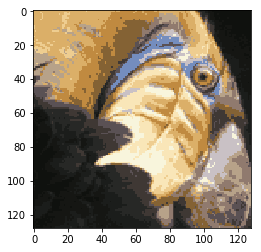

In [27]:
plt.imshow(X_recovered)
plt.show()

# scikit-learn中的K-means

/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


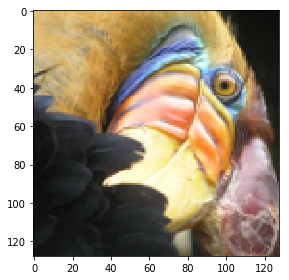

In [28]:
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('data/bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [29]:
pic.shape

(128, 128, 3)

In [30]:
# serialize data
data = pic.reshape(128*128, 3)
data.shape

(16384, 3)

In [31]:
from sklearn.cluster import KMeans#导入kmeans库
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [32]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [34]:
C, centroids

(array([2, 2, 2, ..., 8, 8, 8], dtype=int32),
 array([[0.28749667, 0.25831715, 0.25495907],
        [0.96370881, 0.85953797, 0.63189464],
        [0.8694544 , 0.71809919, 0.45689086],
        [0.08429293, 0.09128267, 0.08108987],
        [0.58685532, 0.49944539, 0.44738635],
        [0.65203908, 0.47359668, 0.21288515],
        [0.97697198, 0.94613305, 0.81784582],
        [0.56753813, 0.71903206, 0.86830065],
        [0.16328576, 0.16513285, 0.15697877],
        [0.75870798, 0.60839923, 0.34328531],
        [0.46538988, 0.33509462, 0.18142955],
        [0.45593757, 0.38606101, 0.35432035],
        [0.38594892, 0.45604515, 0.64401997],
        [0.7005494 , 0.62938335, 0.56274036],
        [0.82765909, 0.74641824, 0.73735896],
        [0.91818825, 0.57212439, 0.25278714]]))

In [35]:
centroids[C].shape, centroids[C]

((16384, 3), array([[0.8694544 , 0.71809919, 0.45689086],
        [0.8694544 , 0.71809919, 0.45689086],
        [0.8694544 , 0.71809919, 0.45689086],
        ...,
        [0.16328576, 0.16513285, 0.15697877],
        [0.16328576, 0.16513285, 0.15697877],
        [0.16328576, 0.16513285, 0.15697877]]))

In [36]:
compressed_pic = centroids[C].reshape((128,128,3))
compressed_pic.shape

(128, 128, 3)

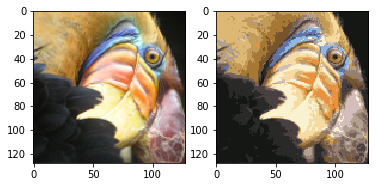

In [37]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()